# Plots - Data Analysis

This file is part of the reproduction package provided with the paper Stationary Equilibria in Behavioral Game Theory: An Experimental Analysis of Inspection Games.

This notebook contains the code for all the data analysis-related plots in the paper.

Questions and correspondence should be addressed to Vinícius Ferraz (visferraz@gmail.com)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd

In [4]:
# reading pre-processed datesets
df = pd.read_csv('data_plots/scatterplots.csv') # individual eq points aggregated
ts_df = pd.read_csv('data_plots/time_series_c_standard_f.csv') # time series predictions for the standard concepts
ts_dfc = pd.read_csv('data_plots/time_series_c_mod.csv') # time series predictions for the modified concepts
ed = pd.read_csv('data_plots/ed_final_std.csv') # consolidated q values
gps_df = pd.read_csv('data_plots/game_prob_split.csv') # data aggregated on a game level
df_p = pd.read_csv('data_plots/tf_player_level.csv') # data aggregated on a participant level
df_ts = pd.read_csv('data_plots/time_series.csv') # data aggregated on a period level 
as_samples= pd.read_csv('data_plots/as_samples.csv') # ASE predictions for all N
ps_samples= pd.read_csv('data_plots/ps_samples.csv') # PSE predictions for all N
data_raw = pd.read_csv('data_plots/df_rep_p.csv') # all experiment's data

In [6]:
df_p

,framed,player_id,round_nr,participant_code,s1,s1_cum,s1_freq,df,Player Type
0,1,1,1,0bmasffv,1,1,1.000000,1.742857,Inspector
1,1,1,1,265l99ai,0,0,0.000000,2.600000,Inspector
2,1,1,1,3cruabz9,1,1,1.000000,1.400000,Inspector
3,1,1,1,3fmd8mik,0,0,0.000000,2.828571,Inspector
4,0,1,1,5xdc3466,1,1,1.000000,3.085714,Inspector
...,...,...,...,...,...,...,...,...,...
6995,1,2,70,vrtjenol,0,12,0.171429,2.542857,Student
6996,0,2,70,x2gcqvwb,0,2,0.028571,3.000000,Student
6997,1,2,70,x6hhcpwc,0,0,0.000000,1.885714,Student
6998,1,2,70,xwsl0cj6,0,0,0.000000,2.114286,Student


In [13]:
# Create a simplified representation of your condition combinations
conditions = {
    'p1=0, p2=0': 0,
    'p1=1, p2=0': 0,
    'p1=0, p2=1': 0,
    'p1=1, p2=1': 0
}

# Iterate through each row to count occurrences of each condition
for index, row in df_p.iterrows():
    # Construct a key for the current row's condition
    key = f'p1={int(row["s1"] if row["player_id"] == 1 else 0)}, p2={int(row["s1"] if row["player_id"] == 2 else 0)}'
    
    # If this is a valid condition, increment its count
    if key in conditions:
        conditions[key] += 1

# Calculate total number of records for normalization
total_records = sum(conditions.values())

# Convert counts to percentages
for key in conditions:
    conditions[key] = (conditions[key] / total_records) * 100

# Print the result
print(conditions)


{'p1=0, p2=0': 80.08571428571429, 'p1=1, p2=0': 19.914285714285715, 'p1=0, p2=1': 0.0, 'p1=1, p2=1': 0.0}


In [5]:
# Data splits and aggregations

obs_framed = df.loc[df['DF_split'] == 'obs_framed']
obs_unframed = df.loc[df['DF_split'] == 'obs_unframed']
nash = df.loc[df['DF_split'] == 'nash']
nashIA_fr = df.loc[df['DF_split'] == 'nashIA_fr']
nashIA_uf = df.loc[df['DF_split'] == 'nashIA_uf']
IB_theory = df.loc[df['DF_split'] == 'ib_theory']
IB_fr = df.loc[df['DF_split'] == 'IB_fr']
IB_uf = df.loc[df['DF_split'] == 'IB_uf']
IBIA_uf = df.loc[df['DF_split'] == 'IB_IA_uf']
IBIA_fr = df.loc[df['DF_split'] == 'IB_IA_fr']
IBIA_FP_fr = df.loc[df['DF_split'] == 'IB_IA_fixedp_fr']
IBIA_FP_uf = df.loc[df['DF_split'] == 'IB_IA_fixedp_uf']
IB2t_IA_uf = df.loc[df['DF_split'] == 'IB2t_IA_uf']
IB2t_IA_fr = df.loc[df['DF_split'] == 'IB2t_IA_fr']
QRE_fr = df.loc[df['DF_split'] == 'QRE_fr']
QRE_uf = df.loc[df['DF_split'] == 'QRE_uf']
AS_fr = df.loc[df['DF_split'] == 'AS_fr']
AS_uf = df.loc[df['DF_split'] == 'AS_uf']
PS_fr = df.loc[df['DF_split'] == 'PS_fr']
PS_uf = df.loc[df['DF_split'] == 'PS_uf']
QRE_it = df.loc[df['DF_split'] == 'QRE_it']
IB_it = df.loc[df['DF_split'] == 'IB_it']
AS_it = df.loc[df['DF_split'] == 'AS_it']
PS_it = df.loc[df['DF_split'] == 'PS_it']

ts_df_fr = ts_df.loc[ts_df['framed'] == 1]
ts_df_uf = ts_df.loc[ts_df['framed'] == 0]

ts_dfc_fr = ts_dfc.loc[ts_dfc['framed'] == 1]
ts_dfc_uf = ts_dfc.loc[ts_dfc['framed'] == 0]

ed_fr = ed.loc[ed['Framed'] == 'Framed']
ed_uf = ed.loc[ed['Framed'] == 'Unframed']

ed_std = ed.loc[ed['STMOD'] == 'Standard']
ed_mod = ed.loc[ed['STMOD'] == 'Modified']

ed_std_fr = ed_std.loc[ed['Framed'] == 'Framed']
ed_std_uf = ed_std.loc[ed['Framed'] == 'Unframed']

ed_mod_fr = ed_mod.loc[ed['Framed'] == 'Framed']
ed_mod_uf = ed_mod.loc[ed['Framed'] == 'Unframed']


data_raw_fr = data_raw.loc[data_raw['Framing'] == 1]
data_raw_uf = data_raw.loc[data_raw['Framing'] == 0]

data_raw_fr_lr = data_raw_fr.loc[data_raw_fr['round_number'] == 70]
data_raw_uf_lr = data_raw_uf.loc[data_raw_uf['round_number'] == 70]

df_ts_dict = {0:'Unframed',1:'Framed'}
df_ts["Treatment"] = df_ts["framed"].map(df_ts_dict)

df_p_dict = {1:'Examiner',2:'Student'}
df_p["Player Type"] = df_p["player_id"].map(df_p_dict)

df_p['Player Type'] = df_p['Player Type'].replace('Examiner', 'Inspector')

data_fr = df_p.loc[df_p['framed']==1]
data_uf = df_p.loc[df_p['framed']==0]

df_ts_sub = df_ts[['round_number', 'Treatment', 'payoff_round_examiner', 'payoff_round_student']]
df_ts_sub.columns = ['Round Number', 'Treatment', 'Inspector', 'Student']
df_ts_subm = df_ts_sub.melt(id_vars=['Round Number', 'Treatment'], var_name='var', value_name='value')

df_ts_subm_fr = df_ts_subm.loc[df_ts_subm['Treatment']=='Framed']
df_ts_subm_uf = df_ts_subm.loc[df_ts_subm['Treatment']=='Unframed']

as_samples["Sample Size (N)"] = as_samples["Sample Size N"].astype("string")
ps_samples["Sample Size (N)"] = ps_samples["Sample Size N"].astype("string")

### Sample plots

In [62]:
fig_size = (3.25,3.25)

x_lim = (1, 70)
y_lim = (0, 1)

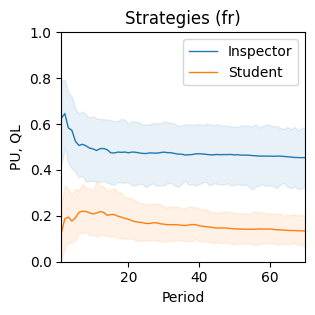

In [63]:
plt.figure(figsize=fig_size)
ax = sns.lineplot(data=data_fr, x='round_nr', y='s1_freq', hue='Player Type',err_kws={"alpha": .1}, linewidth = 1)
plt.title('Strategies (fr)')
plt.xlabel("Period")
plt.ylabel("PU, QL")
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend_.set_title(None)
plt.tight_layout()

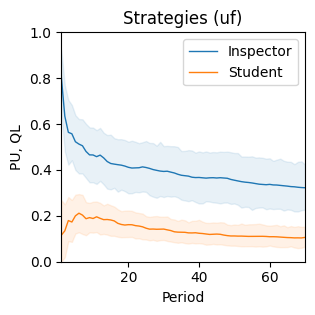

In [64]:
plt.figure(figsize=fig_size)
ax = sns.lineplot(data=data_uf, x='round_nr', y='s1_freq', hue='Player Type',err_kws={"alpha": .1}, linewidth = 1)
plt.title('Strategies (uf)')
plt.xlabel("Period")
plt.ylabel("PU, QL")
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend_.set_title(None)
plt.tight_layout()

In [65]:
y_lim = (0, 16)

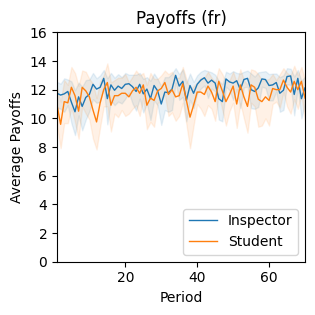

In [66]:
plt.figure(figsize=fig_size)
ax = sns.lineplot(data=df_ts_subm_fr, x='Round Number', y='value', hue='var',err_kws={"alpha": .1}, linewidth = 1)
plt.title('Payoffs (fr)')
plt.xlabel("Period")
plt.ylabel("Average Payoffs")
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend_.set_title(None)
plt.legend(loc='lower right')
plt.tight_layout()

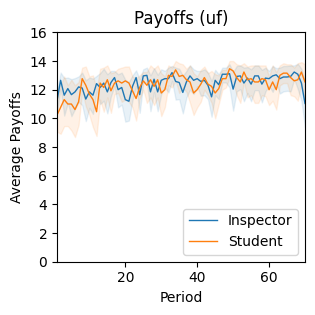

In [67]:
plt.figure(figsize=fig_size)
ax = sns.lineplot(data=df_ts_subm_uf, x='Round Number', y='value', hue='var',err_kws={"alpha": .1}, linewidth = 1)
plt.title('Payoffs (uf)')
plt.xlabel("Period")
plt.ylabel("Average Payoffs")
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend_.set_title(None)
plt.legend(loc='lower right')
plt.tight_layout()

Text(0.5, 1.0, 'Payoffs Distribution (fr)')

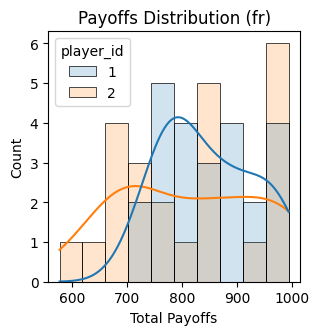

In [77]:
plt.figure(figsize=fig_size)
ax = sns.histplot(data=data_raw_fr_lr, x='player_total_payoff', hue='player_id', kde=True,
                  palette = 'tab10', alpha=0.2, linewidth=0.5, bins=10)
ax.set_xlabel("Total Payoffs")
plt.title('Payoffs Distribution (fr)')

Text(0.5, 1.0, 'Payoffs Distribution (uf)')

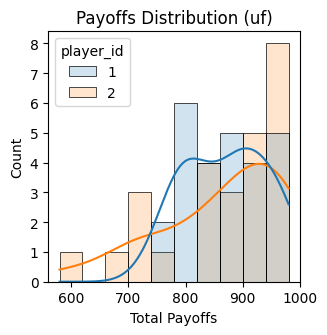

In [80]:
plt.figure(figsize=fig_size)
ax = sns.histplot(data=data_raw_uf_lr, x='player_total_payoff', hue='player_id', kde=True,
                  palette = 'tab10', alpha=0.2, linewidth=0.5, bins=10)
ax.set_xlabel("Total Payoffs")
plt.title('Payoffs Distribution (uf)')

Text(0.5, 1.0, 'Strategies Distribution (fr)')

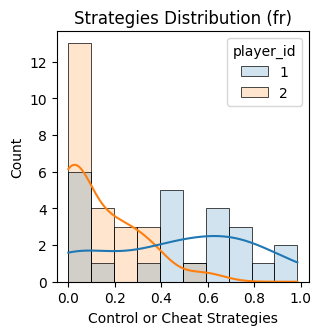

In [83]:
plt.figure(figsize=fig_size)
ax = sns.histplot(data=data_raw_fr_lr, x='s1_freq', hue='player_id', kde=True,
                  palette = 'tab10', alpha=0.2, linewidth=0.5, bins=10)
ax.set_xlabel("Control or Cheat Strategies")
plt.title('Strategies Distribution (fr)')

Text(0.5, 1.0, 'Strategies Distribution (uf)')

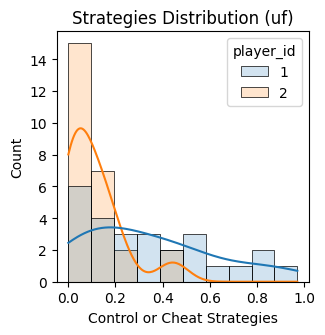

In [84]:
plt.figure(figsize=fig_size)
ax = sns.histplot(data=data_raw_uf_lr, x='s1_freq', hue='player_id', kde=True,
                  palette = 'tab10', alpha=0.2, linewidth=0.5, bins=10)
ax.set_xlabel("Control or Cheat Strategies")
plt.title('Strategies Distribution (uf)')

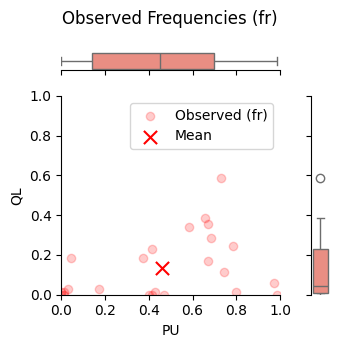

In [13]:
if __name__ == '__main__':

    gps_df_fr = gps_df.loc[gps_df['framed'] == 1]
    gps_df_uf = gps_df.loc[gps_df['framed'] == 0]

    x_lim = [0,1]
    y_lim = [0,1]

    ms1 = 90
    ms2 = 130

    ms_small = 10

    g_l = 0.5
    g_c = 'grey'
    g_alpha = 0.2

    fig_size = (4,4)

    g = sns.JointGrid(data=gps_df_fr, x="freq_p1", y="freq_p2", height=3.5)
    g.plot_joint(plt.scatter, color='red', alpha=0.2, label='Observed (fr)')
    g.ax_joint.scatter(0.461, 0.136, c='red', marker='x', s=ms1, label='Mean')
    g.plot_marginals(sns.boxplot, color='salmon')

    plt.legend()

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    g.fig.suptitle("Observed Frequencies (fr)")
    g.ax_joint.set_xlabel('PU')
    g.ax_joint.set_ylabel('QL')
    plt.tight_layout()

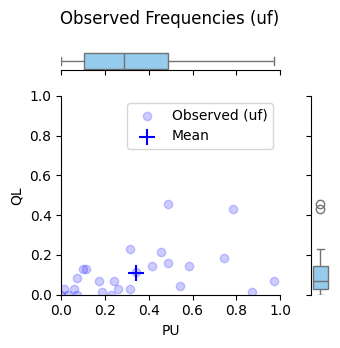

In [14]:
if __name__ == '__main__':

    gps_df_fr = gps_df.loc[gps_df['framed'] == 1]
    gps_df_uf = gps_df.loc[gps_df['framed'] == 0]

    x_lim = [0,1]
    y_lim = [0,1]


    ms1 = 90
    ms2 = 130

    ms_small = 10

    g_l = 0.5
    g_c = 'grey'
    g_alpha = 0.2

    fig_size = (4,4)

    g = sns.JointGrid(data=gps_df_uf, x="freq_p1", y="freq_p2", height=3.5)
    g.plot_joint(plt.scatter, color='blue', alpha=0.2, label='Observed (uf)')
    g.ax_joint.scatter(0.341, 0.108, c='blue', marker='+', s=ms2, label='Mean')
    g.plot_marginals(sns.boxplot, color='lightskyblue')

    plt.legend()

    plt.ylim(0, 1)
    plt.xlim(0, 1)
    g.fig.suptitle("Observed Frequencies (uf)")
    g.ax_joint.set_xlabel('PU')
    g.ax_joint.set_ylabel('QL')
    plt.tight_layout()

### EQ plots - standard

In [15]:
x_lim = [0,1]
y_lim = [0,1]

ms1 = 90
ms2 = 130

ms_small = 10

g_l = 0.5
g_c = 'grey'
g_alpha = 0.2

fig_size = (3.25,3.25)

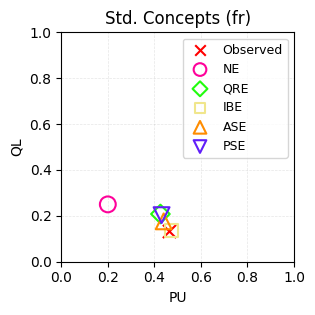

In [17]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax3 = ax.scatter(QRE_fr['PU'],QRE_fr['PL'], marker = 'D', s=ms1, facecolor='none', edgecolor='xkcd:electric green', linewidth=1.5)
ax4 = ax.scatter(IB_theory['PU'],IB_theory['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='khaki', linewidth=1.5)
#ax5 = ax.scatter(IB_fr['PU'],IB_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:dandelion', linewidth=1.5)
ax6 = ax.scatter(AS_fr['PU'],AS_fr['PL'], marker = '^', s=ms2, facecolor='none', edgecolor='darkorange', linewidth=1.5)
ax7 = ax.scatter(PS_fr['PU'],PS_fr['PL'], marker = 'v', s=ms2, facecolor='none', edgecolor='xkcd:purplish blue', linewidth=1.5)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax2, ax3, ax4, ax6, ax7),
           ('Observed', 'NE', 'QRE', 'IBE', 'ASE', 'PSE'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)

plt.title('Std. Concepts (fr)')
plt.tight_layout()

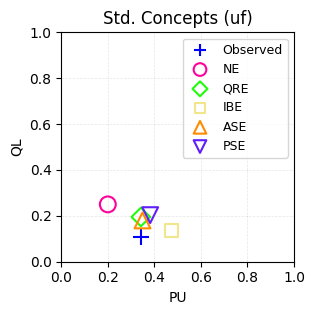

In [18]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax2 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax3 = ax.scatter(QRE_uf['PU'],QRE_uf['PL'], marker = 'D', s=ms1, facecolor='none', edgecolor='xkcd:electric green', linewidth=1.5)
ax4 = ax.scatter(IB_theory['PU'],IB_theory['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='khaki', linewidth=1.5)
#ax5 = ax.scatter(IB_uf['PU'],IB_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:sunny yellow', linewidth=1.5)
ax6 = ax.scatter(AS_uf['PU'],AS_uf['PL'], marker = '^', s=ms2, facecolor='none', edgecolor='darkorange', linewidth=1.5)
ax7 = ax.scatter(PS_uf['PU'],PS_uf['PL'], marker = 'v', s=ms2, facecolor='none', edgecolor='xkcd:purplish blue', linewidth=1.5)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax2, ax3, ax4, ax6, ax7),
           ('Observed', 'NE', 'QRE', 'IBE', 'ASE', 'PSE'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('Std. Concepts (uf)')
plt.tight_layout()

### EQ plots - modified

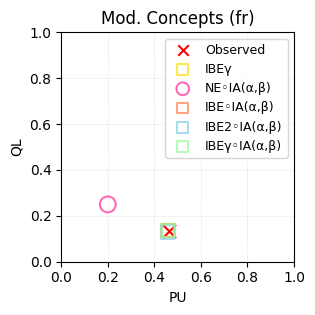

In [19]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(IB_fr['PU'],IB_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:dandelion', linewidth=1.5, alpha = 0.7)
ax3 = ax.scatter(nashIA_fr['PU'],nashIA_fr['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='hotpink', linewidth=1.5)
ax4 = ax.scatter(IBIA_fr['PU'],IBIA_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='coral', linewidth=1.5, alpha = 0.7)
ax5 = ax.scatter(IBIA_FP_fr['PU'],IBIA_FP_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='skyblue', linewidth=1.5, alpha = 0.7)
ax6 = ax.scatter(IB2t_IA_fr['PU'],IB2t_IA_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='palegreen', linewidth=1.5, alpha = 0.7)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax2, ax3, ax4, ax5, ax6),
           ('Observed', 'IBEγ','NE◦IA(α,β)', 'IBE◦IA(α,β)','IBE2◦IA(α,β)', 'IBEγ◦IA(α,β)'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('Mod. Concepts (fr)')
plt.tight_layout()

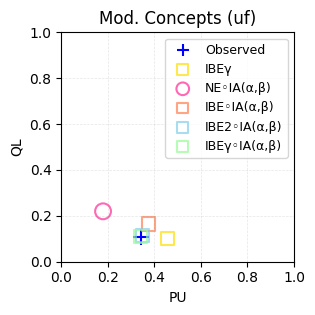

In [20]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax2 = ax.scatter(nashIA_uf['PU'],nashIA_uf['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='hotpink', linewidth=1.5)
ax3 = ax.scatter(IB_uf['PU'],IB_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:dandelion', linewidth=1.5, alpha = 0.7)
ax4 = ax.scatter(IBIA_uf['PU'],IBIA_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='coral', linewidth=1.5, alpha = 0.7)
ax5 = ax.scatter(IBIA_FP_uf['PU'],IBIA_FP_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='skyblue', linewidth=1.5, alpha = 0.7)
ax6 = ax.scatter(IB2t_IA_uf['PU'],IB2t_IA_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='palegreen', linewidth=1.5, alpha = 0.7)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax3, ax2, ax4, ax5, ax6),
           ('Observed', 'IBEγ','NE◦IA(α,β)', 'IBE◦IA(α,β)','IBE2◦IA(α,β)', 'IBEγ◦IA(α,β)'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('Mod. Concepts (uf)')
plt.tight_layout()

### Function plots

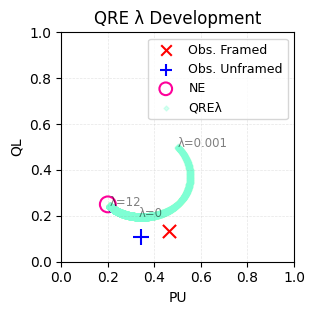

In [21]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax4 = ax.scatter(QRE_it['PU'],QRE_it['PL'], marker = 'D', s=ms_small, facecolor='aquamarine', edgecolor='aquamarine', alpha = 0.3)
#ax5 = ax.scatter(IB_it['PU'],IB_it['PL'], marker = 's', s=ms_small, facecolor='xkcd:sunflower yellow', edgecolor='xkcd:sunflower yellow', alpha = 0.1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.text(0.330698001,0.195676405,'λ=0', alpha=0.5, size='small')
plt.text(0.500747744,0.499248131,'λ=0.001', alpha=0.5, size='small')
plt.text(0.209570015,0.240781117,'λ=12', alpha=0.5, size='small')


plt.legend((ax1, ax2, ax3, ax4),
           ('Obs. Framed', 'Obs. Unframed', 'NE', 'QREλ'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('QRE λ Development')
plt.tight_layout()

Text(0.5, 1.0, 'QRE λ Development')

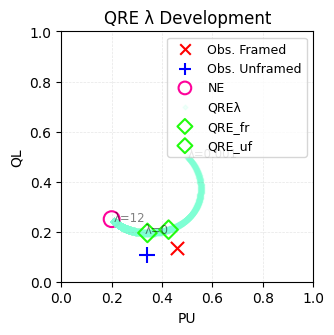

In [22]:
#%% PLOT1 - MODIFIED PRESENTATION
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax4 = ax.scatter(QRE_it['PU'],QRE_it['PL'], marker = 'D', s=ms_small, facecolor='aquamarine', edgecolor='aquamarine', alpha = 0.1)
ax5 = ax.scatter(QRE_fr['PU'],QRE_fr['PL'], marker = 'D', s=ms1, facecolor='none', edgecolor='xkcd:electric green', linewidth=1.5)
ax6 = ax.scatter(QRE_uf['PU'],QRE_uf['PL'], marker = 'D', s=ms1, facecolor='none', edgecolor='xkcd:electric green', linewidth=1.5)

#ax5 = ax.scatter(IB_it['PU'],IB_it['PL'], marker = 's', s=ms_small, facecolor='xkcd:sunflower yellow', edgecolor='xkcd:sunflower yellow', alpha = 0.1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.text(0.330698001,0.195676405,'λ=0', alpha=0.5, size='small')
plt.text(0.500747744,0.499248131,'λ=0.001', alpha=0.5, size='small')
plt.text(0.209570015,0.240781117,'λ=12', alpha=0.5, size='small')


plt.legend((ax1, ax2, ax3, ax4, ax5, ax6),
           ('Obs. Framed', 'Obs. Unframed', 'NE', 'QREλ', 'QRE_fr', 'QRE_uf'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('QRE λ Development')


Text(0.5, 1.0, 'IBE γ Development')

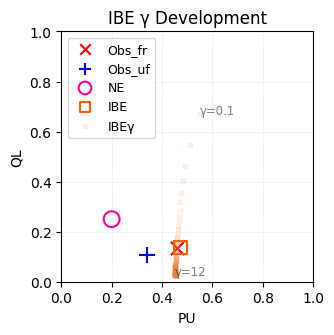

In [24]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax4 = ax.scatter(IB_theory['PU'],IB_theory['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:bright orange', linewidth=1.5)
#ax4 = ax.scatter(QRE_it['PU'],QRE_it['PL'], marker = 'D', s=ms_small, facecolor='aquamarine', edgecolor='aquamarine', alpha = 0.3)
ax5 = ax.scatter(IB_it['PU'],IB_it['PL'], marker = 's', s=ms_small, facecolor='xkcd:dusty orange', edgecolor='xkcd:dusty orange', alpha = 0.1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.text(0.550510257, 0.67118691, 'γ=0.1', alpha=0.5, size='small')
plt.text(0.450772205,0.024755275, 'γ=12', alpha=0.5, size='small')

plt.legend((ax1, ax2, ax3, ax4, ax5),
           ('Obs_fr', 'Obs_uf', 'NE', 'IBE','IBEγ'),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('IBE γ Development')

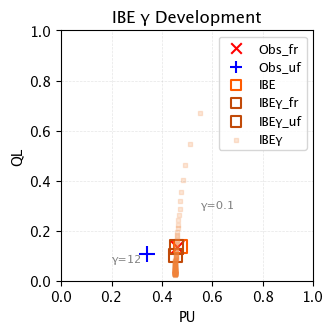

In [32]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(IB_theory['PU'],IB_theory['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:bright orange', linewidth=1.5)
ax4 = ax.scatter(IB_fr['PU'],IB_fr['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:brick orange', linewidth=1.5)
ax5 = ax.scatter(IB_uf['PU'],IB_uf['PL'], marker = 's', s=ms1, facecolor='none', edgecolor='xkcd:brick orange', linewidth=1.5)
#ax4 = ax.scatter(QRE_it['PU'],QRE_it['PL'], marker = 'D', s=ms_small, facecolor='aquamarine', edgecolor='aquamarine', alpha = 0.3)
ax6 = ax.scatter(IB_it['PU'],IB_it['PL'], marker = 's', s=ms_small, facecolor='xkcd:dusty orange', edgecolor='xkcd:dusty orange', alpha = 0.2)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.text(0.551, 0.29, 'γ=0.1', alpha=0.5, size='small')
plt.text(0.197, 0.075, 'γ=12', alpha=0.5, size='small')

plt.legend((ax1, ax2, ax3, ax4, ax5, ax6),
           ('Obs_fr', 'Obs_uf', 'IBE', 'IBEγ_fr','IBEγ_uf','IBEγ'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('IBE γ Development')
plt.show()
#fig.savefig('pltIBEforpres2.png', format='png', dpi=1200, transparent=True)


### Sampling Equilibria Plots

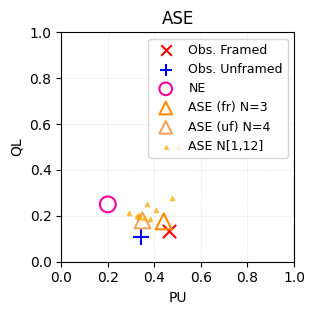

In [25]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax4 = ax.scatter(AS_fr['PU'],AS_fr['PL'], marker = '^', s=ms2, facecolor='none', edgecolor='darkorange', linewidth=1.5)
ax5 = ax.scatter(AS_uf['PU'],AS_uf['PL'], marker = '^', s=ms2, facecolor='none', edgecolor='sandybrown', linewidth=1.5)
ax6 = ax.scatter(AS_it['PU'],AS_it['PL'], marker = '^', s=ms_small, facecolor='orange', edgecolor='orange', alpha = 0.6)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax2, ax3, ax4, ax5, ax6),
           ('Obs. Framed', 'Obs. Unframed', 'NE', 'ASE (fr) N=3', 'ASE (uf) N=4', 'ASE N[1,12]' ),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('ASE')
plt.tight_layout()

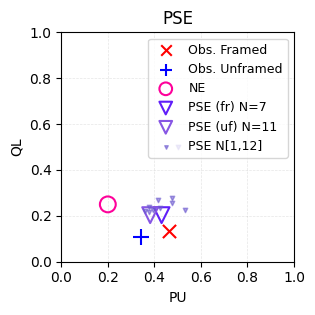

In [26]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = ax.scatter(obs_framed['PU'],obs_framed['PL'], c='red', marker='x',s=ms1)
ax2 = ax.scatter(obs_unframed['PU'],obs_unframed['PL'], c='blue', marker = '+', s=ms2)
ax3 = ax.scatter(nash['PU'],nash['PL'], marker = 'o', s=ms2, facecolor='none', edgecolor='xkcd:neon pink', linewidth=1.5)
ax4 = ax.scatter(PS_fr['PU'],PS_fr['PL'], marker = 'v', s=ms2, facecolor='none', edgecolor='xkcd:purplish blue', linewidth=1.5)
ax5 = ax.scatter(PS_uf['PU'],PS_uf['PL'], marker = 'v', s=ms2, facecolor='none', edgecolor='xkcd:purpley', linewidth=1.5)
ax6 = ax.scatter(PS_it['PU'],PS_it['PL'], marker = 'v', s=ms_small, facecolor='xkcd:light indigo', edgecolor='xkcd:light indigo', alpha = 0.6)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.set_xlabel('PU')
ax.set_ylabel('QL')

plt.legend((ax1, ax2, ax3, ax4, ax5, ax6),
           ('Obs. Framed', 'Obs. Unframed', 'NE', 'PSE (fr) N=7', 'PSE (uf) N=11', 'PSE N[1,12]'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           markerscale = 0.8,
           fontsize=9)
plt.title('PSE')
plt.tight_layout()

In [27]:
fig_size = (3.25,3.25)
y_lim = [-0.1, 0.40]
barWidth = 0.25
mypal = ['salmon','lightskyblue']

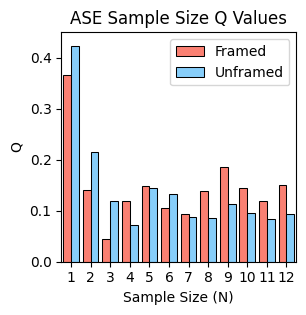

In [28]:
fig = plt.subplots(figsize=fig_size)
ax = sns.barplot(x="Sample Size (N)", y="Q", hue='Hue', data=as_samples, 
                 palette = mypal,edgecolor="black", saturation=1, linewidth=0.75)
ax.legend().set_title('')

plt.title('ASE Sample Size Q Values')
plt.ylabel('Q')

axes = plt.gca()
axes.set_ylim([0,0.45])

plt.tight_layout()

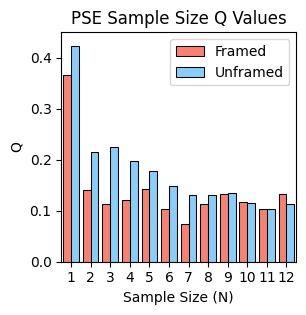

In [29]:
fig = plt.subplots(figsize=fig_size)

ax = sns.barplot(x="Sample Size (N)", y="Q", hue="Hue", data=ps_samples, 
                 palette = mypal,edgecolor="black",saturation=1, linewidth=0.75)
ax.legend().set_title('')

plt.title('PSE Sample Size Q Values')
plt.ylabel('Q')

axes = plt.gca()
axes.set_ylim([0,0.45])

plt.tight_layout()

### Time-series Q plots

In [30]:
fig_size = (3.25,3)
y_lim = [-0.1, 0.7]
x_lim = [0, 70]

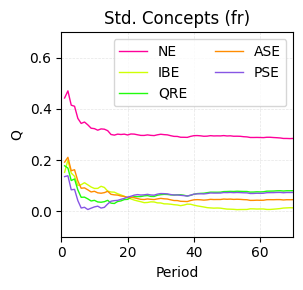

In [31]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = plt.plot(ts_df_fr['round'], ts_df_fr['NE_ed'], label = 'NE', linewidth=1, color = 'xkcd:neon pink')
ax2 = plt.plot(ts_df_fr['round'], ts_df_fr['IBT_ed'], label = 'IBE', linewidth=1, color = 'xkcd:neon yellow')
# ax3 = plt.plot(ts_df_fr['round'], ts_df_fr['IBMOD_ed'], label = 'IB_mod', linewidth=1,  color = 'xkcd:sunflower yellow')
# ax4 = plt.plot(ts_df_fr['round'], ts_df_fr['IBMODIA_ed'], label = 'IB_modIA', linewidth=1,  color = 'yellow')
ax3 = plt.plot(ts_df_fr['round'], ts_df_fr['QRE_ed'], label = 'QRE', linewidth=1, color= 'xkcd:electric green')
ax4 = plt.plot(ts_df_fr['round'], ts_df_fr['AS_ed'], label = 'ASE', linewidth=1, color = 'darkorange')
ax5 = plt.plot(ts_df_fr['round'], ts_df_fr['PS_ed'], label = 'PSE', linewidth=1, color = 'xkcd:purpley')
plt.title('Std. Concepts (fr)')
ax.set_xlabel('Period')
ax.set_ylabel('Q')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend(ncol=2)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
plt.tight_layout()

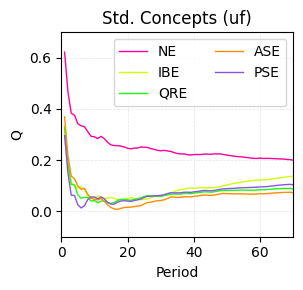

In [32]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = plt.plot(ts_df_uf['round'], ts_df_uf['NE_ed'], label = 'NE', linewidth=1, color = 'xkcd:neon pink')
ax2 = plt.plot(ts_df_uf['round'], ts_df_uf['IBT_ed'], label = 'IBE', linewidth=1, color = 'xkcd:neon yellow')
# ax3 = plt.plot(ts_df_uf['round'], ts_df_uf['IBMOD_ed'], label = 'IB_mod', linewidth=1, color = 'xkcd:sunflower yellow')
# ax4 = plt.plot(ts_df_fr['round'], ts_df_fr['IBMODIA_ed'], label = 'IB_modIA', linewidth=1,  color = 'yellow')
ax3 = plt.plot(ts_df_uf['round'], ts_df_uf['QRE_ed'], label = 'QRE', linewidth=1, color='xkcd:electric green')
ax4 = plt.plot(ts_df_uf['round'], ts_df_uf['AS_ed'], label = 'ASE', linewidth=1, color = 'darkorange')
ax5 = plt.plot(ts_df_uf['round'], ts_df_uf['PS_ed'], label = 'PSE', linewidth=1, color = 'xkcd:purpley')
ax.set_ylim(y_lim)
plt.title('Std. Concepts (uf)')
ax.set_xlabel('Period')
ax.set_ylabel('Q')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend(ncol=2)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
plt.tight_layout()

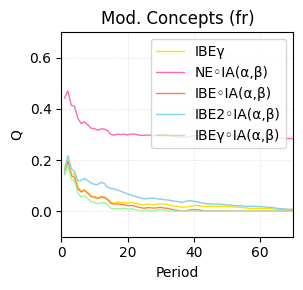

In [33]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IBMOD_ed'], label = 'IBEγ', linewidth=1, color = 'xkcd:dandelion')
ax2 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['NEIA_ed'], label = 'NE◦IA(α,β)', linewidth=1, color = 'hotpink')
ax3 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IBMODIA_ed'], label = 'IBE◦IA(α,β)', linewidth=1, color = 'coral')
ax4 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIAFP_ed'], label = 'IBE2◦IA(α,β)', linewidth=1, color = 'skyblue')
ax5 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_ed'], label = 'IBEγ◦IA(α,β)', linewidth=1, color = 'palegreen')

plt.title('Mod. Concepts (fr)')
ax.set_xlabel('Period')
ax.set_ylabel('Q')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend()
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
plt.tight_layout()

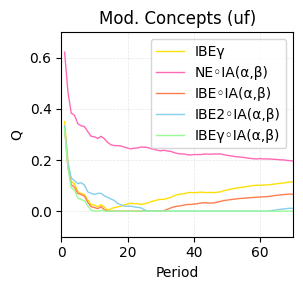

In [34]:
fig, ax = plt.subplots(figsize=fig_size)
ax1 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IBMOD_ed'], label = 'IBEγ', linewidth=1, color = 'xkcd:dandelion')
ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['NEIA_ed'], label = 'NE◦IA(α,β)', linewidth=1, color = 'hotpink')
ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IBMODIA_ed'], label = 'IBE◦IA(α,β)', linewidth=1, color = 'coral')
ax4 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIAFP_ed'], label = 'IBE2◦IA(α,β)', linewidth=1, color = 'skyblue')
ax5 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_ed'], label = 'IBEγ◦IA(α,β)', linewidth=1, color = 'palegreen')

plt.title('Mod. Concepts (uf)')
ax.set_xlabel('Period')
ax.set_ylabel('Q')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.legend()
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
plt.tight_layout()

### Parameter Plots

In [35]:
fig_size = (3.25,2.5)

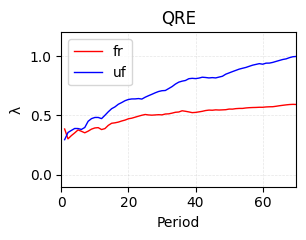

In [36]:
y_lim = [-0.1, 1.2]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_df_fr['round'], ts_df_fr['QRE_lambda'], label = 'fr', linewidth=1, color='red')
ax2 = plt.plot(ts_df_uf['round'], ts_df_uf['QRE_lambda'], label = 'uf', linewidth=1, color='blue')

plt.title('QRE')
ax.set_xlabel('Period')
ax.set_ylabel('λ')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

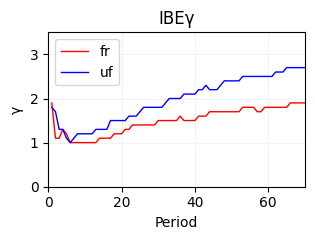

In [37]:
y_lim = [0, 3.5]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MOD_gamma'], label = 'fr', linewidth=1, color='red')
ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MOD_gamma'], label = 'uf', linewidth=1, color='blue')

plt.title('IBEγ')
ax.set_xlabel('Period')
ax.set_ylabel('γ')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

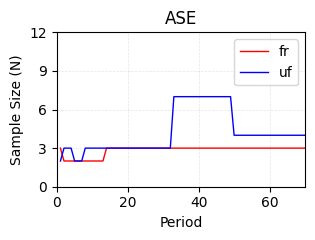

In [38]:
y_lim = [0, 12]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_df_fr['round'], ts_df_fr['AS_N'], label = 'fr', linewidth=1, color='red')
ax2 = plt.plot(ts_df_uf['round'], ts_df_uf['AS_N'], label = 'uf', linewidth=1, color='blue')

ticksy = [0,3,6,9,12]

plt.title('ASE')
ax.set_xlabel('Period')
ax.set_ylabel('Sample Size (N)')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
plt.yticks(ticksy)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

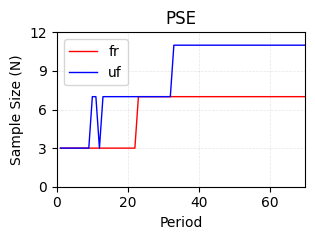

In [39]:
y_lim = [0, 12]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_df_fr['round'], ts_df_fr['PS_N'], label = 'fr', linewidth=1, color='red')
ax2 = plt.plot(ts_df_uf['round'], ts_df_uf['PS_N'], label = 'uf', linewidth=1, color='blue')

ticksy = [0,3,6,9,12]

plt.title('PSE')
ax.set_xlabel('Period')
ax.set_ylabel('Sample Size (N)')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
plt.yticks(ticksy)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

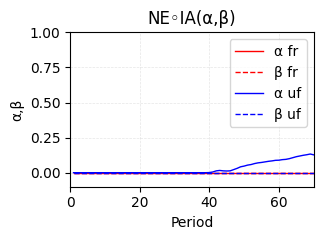

In [40]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['NEIA_alpha'], label = 'α fr', linewidth=1, color='red')
ax2 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['NEIA_beta'], label = 'β fr', linewidth=1, color='red', linestyle = '--')

ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['NEIA_alpha'], label = 'α uf', linewidth=1, color='blue')
ax4 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['NEIA_beta'], label = 'β uf', linewidth=1, color='blue', linestyle = '--')

plt.title('NE◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('α,β')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

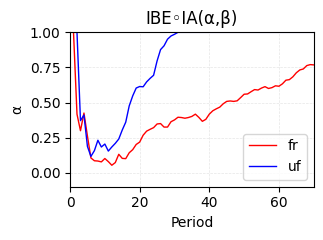

In [41]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIA_alpha'], label = 'fr', linewidth=1, color='red')
#ax2 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIA_beta'], label = 'β fr', linewidth=1, color='red', linestyle = '--')

ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIA_alpha'], label = 'uf', linewidth=1, color='blue')
#ax4 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIA_beta'], label = 'β uf', linewidth=1, color='blue', linestyle = '--')

plt.title('IBE◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('α')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

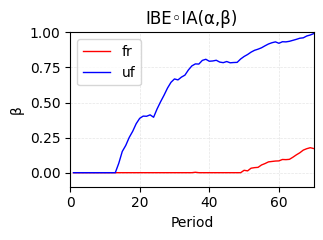

In [42]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

#ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIA_alpha'], label = 'α fr', linewidth=1, color='red')
ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIA_beta'], label = 'fr', linewidth=1, color='red')

#ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIA_alpha'], label = 'α uf', linewidth=1, color='blue')
ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIA_beta'], label = 'uf', linewidth=1, color='blue')

plt.title('IBE◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('β')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

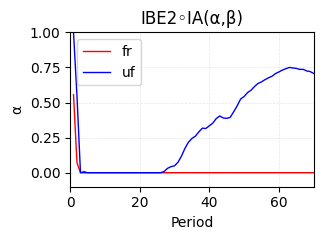

In [43]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIAFP_alpha'], label = 'fr', linewidth=1, color='red')
#ax2 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIAFP_beta'], label = 'β fr', linewidth=1, color='red', linestyle = '--')

ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIAFP_alpha'], label = 'uf', linewidth=1, color='blue')
#ax4 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIAFP_beta'], label = 'β uf', linewidth=1, color='blue', linestyle = '--')

plt.title('IBE2◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('α')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

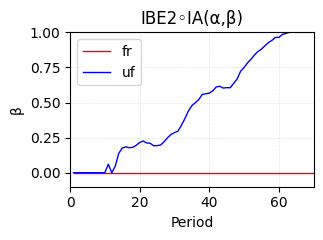

In [44]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

#ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIAFP_alpha'], label = 'α fr', linewidth=1, color='red')
ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_MODIAFP_beta'], label = 'fr', linewidth=1, color='red')

#ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIAFP_alpha'], label = 'α uf', linewidth=1, color='blue')
ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_MODIAFP_beta'], label = 'uf', linewidth=1, color='blue')

plt.title('IBE2◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('β')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

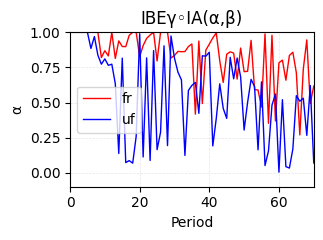

In [46]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_alpha'], label = 'fr', linewidth=1, color='red')
#ax2 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_beta'], label = 'β fr', linewidth=1, color='red', linestyle = '--')

ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_alpha'], label = 'uf', linewidth=1, color='blue')
#ax4 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_beta'], label = 'β uf', linewidth=1, color='blue', linestyle = '--')

plt.title('IBEγ◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('α')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

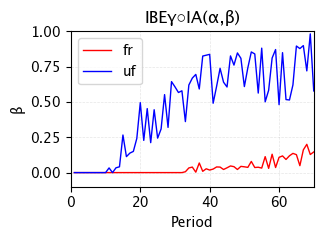

In [244]:
y_lim = [-0.1, 1]
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

#ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_alpha'], label = 'α fr', linewidth=1, color='red')
ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_beta'], label = 'fr', linewidth=1, color='red')

#ax3 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_alpha'], label = 'α uf', linewidth=1, color='blue')
ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_beta'], label = 'uf', linewidth=1, color='blue')

plt.title('IBEγ◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('β')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig('paramIBIAgammaabbetta.png', format='png', dpi=1200, transparent=True)

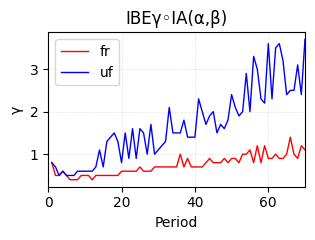

In [47]:
x_lim = [0, 70]
fig, ax = plt.subplots(figsize=fig_size)

ax1 = plt.plot(ts_dfc_fr['round'], ts_dfc_fr['IB_3PAR_gamma'], label = 'fr', linewidth=1, color='red')

ax2 = plt.plot(ts_dfc_uf['round'], ts_dfc_uf['IB_3PAR_gamma'], label = 'uf', linewidth=1, color='blue')

plt.title('IBEγ◦IA(α,β)')
ax.set_xlabel('Period')
ax.set_ylabel('γ')
#ax.set_ylim(y_lim)
ax.set_xlim(x_lim)
ax.grid(visible=True, which='major', color=g_c, linestyle='--', linewidth=g_l, alpha=g_alpha)
ax.legend()
plt.tight_layout()

### Q plots

In [48]:
fig_size = (4,2.5)
y_lim = [-0.1, 0.30]

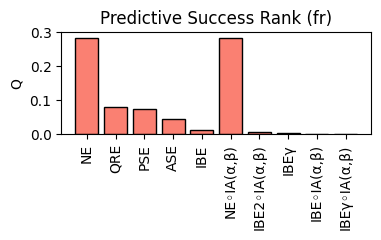

In [49]:
fig, axa = plt.subplots(figsize=fig_size)
ax = plt.bar(ed_fr['EQConcept'], ed_fr['ED'], color='salmon', edgecolor='black')

plt.title('Predictive Success Rank (fr)')
plt.ylabel('Q')

axes = plt.gca()
axes.set_ylim([0,0.3])
plt.xticks(rotation='vertical')
plt.tight_layout()

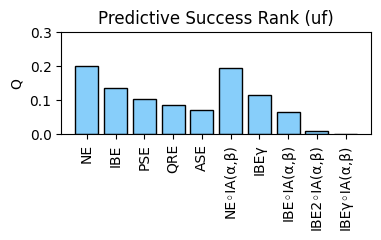

In [50]:
fig, ax1 = plt.subplots(figsize=fig_size)
ax1 = plt.bar(ed_uf['EQConcept'], ed_uf['ED'], color='lightskyblue', edgecolor='black')

plt.title('Predictive Success Rank (uf)')
plt.ylabel('Q')

axes = plt.gca()
axes.set_ylim([0,0.3])
plt.xticks(rotation='vertical')

plt.tight_layout()